<a href="https://colab.research.google.com/github/PhucNguyenZed/AnalystDeepLearning/blob/main/HomeWork_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRÌNH BÀY DỮ LIỆU**

In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
df = pd.read_csv("/drive/My Drive/DataAnalyst/processed_dulieuxettuyendaihoc.csv", index_col = "STT")
df

,Unnamed: 0,Unnamed: 0.1,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
STT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.06,K,K,K,2.800,3.016,2.824,0.0
2,1,1,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,0.0,1,6.00,4.00,3.50,C,4.69,5.47,4.70,Y,TB,Y,1.876,2.188,1.880,0.0
3,2,2,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,0.0,1,5.00,6.75,4.00,C,5.77,5.38,4.33,TB,TB,Y,2.308,2.152,1.732,1.0
4,3,3,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,0.0,1,4.25,4.25,5.25,D1,6.21,5.20,6.03,TB,TB,TB,2.484,2.080,2.412,0.0
5,4,4,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,0.0,2NT,4.25,4.50,5.00,A,6.50,6.36,7.01,K,TB,K,2.600,2.544,2.804,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,95,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,0.0,1,5.25,1.50,6.25,C,7.43,7.42,7.04,K,K,K,2.972,2.968,2.816,0.0
97,96,96,3.7,5.4,6.0,5.1,5.5,3.9,6.1,4.4,4.1,4.8,5.1,4.7,5.9,6.9,4.6,5.4,3.1,3.1,5.3,5.8,5.6,5.4,6.6,4.2,3.4,4.9,5.9,6.9,5.6,6.4,5.7,4.3,5.5,4.7,4.6,3.4,6.9,7.6,7.4,4.9,5.7,7.7,5.0,7.0,6.5,7.9,7.5,4.4,F,0.0,1,5.25,3.75,4.75,C,4.93,5.15,4.78,Y,TB,Y,1.972,2.060,1.912,0.0
98,97,97,8.8,5.5,7.4,7.7,6.2,7.3,8.1,4.5,9.5,7.3,6.0,8.4,7.0,8.4,8.8,6.5,9.5,6.6,6.4,7.6,7.0,9.6,9.3,6.7,8.5,6.9,5.8,8.4,8.0,8.9,9.6,7.1,9.0,7.1,6.7,5.7,6.9,8.6,8.6,5.9,8.5,7.1,6.2,8.6,7.0,9.6,8.4,5.8,M,0.0,2NT,7.00,8.00,4.00,C,7.05,7.84,7.92,K,K,K,2.820,3.136,3.168,1.0


**Phần 1:**

In [5]:
sorted_df_DH1=df["DH1"].sort_values()
print(sorted_df_DH1)

STT
54    1.00
44    1.25
73    1.50
6     1.50
88    1.75
      ... 
85    6.50
12    6.75
24    6.75
25    7.00
98    7.00
Name: DH1, Length: 100, dtype: float64


In [6]:
sorted_df_DH2= df.sort_values(by=["DH2","GT"],ascending=[True,True])
print(sorted_df_DH2)

     Unnamed: 0  Unnamed: 0.1   T1   L1  ...  US_TBM1  US_TBM2  US_TBM3  KQXT
STT                                      ...                                 
96           95            95  8.6  6.9  ...    2.972    2.968    2.816   0.0
26           25            25  3.6  5.8  ...    2.160    2.080    2.008   0.0
25           24            24  2.4  4.1  ...    1.780    1.952    2.124   0.0
47           46            46  6.7  6.8  ...    2.596    2.604    2.780   0.0
95           94            94  5.8  5.9  ...    2.440    2.684    2.748   0.0
..          ...           ...  ...  ...  ...      ...      ...      ...   ...
12           11            11  7.9  7.0  ...    2.972    3.088    2.996   1.0
48           47            47  7.9  7.6  ...    3.068    2.996    2.904   1.0
7             6             6  2.8  3.9  ...    1.960    2.240    2.096   1.0
3             2             2  5.6  6.8  ...    2.308    2.152    1.732   1.0
98           97            97  8.8  5.5  ...    2.820    3.136  

In [7]:
def Q1(g):
  return np.percentile(g,25)
def Q2(g):
  return np.percentile(g,50)
def Q3(g):
  return np.percentile(g,75)
def std(g):
  return np.std(g)

In [8]:
KT_DH1 = pd.pivot_table(df, values='DH1', index=['KT'],aggfunc=['count','sum','median','min','max','std',Q1,Q2,Q3])
KT_DH1

,count,sum,median,min,max,std,Q1,Q2,Q3
,DH1,DH1,DH1,DH1,DH1,DH1,DH1,DH1,DH1
KT,,,,,,,,,
A,49,163.50,3.25,1.00,6.50,1.274296,2.2500,3.25,4.250
A1,6,17.50,3.00,2.00,4.25,0.861201,2.1875,3.00,3.250
B,9,29.50,3.50,1.75,4.50,0.823905,3.2500,3.50,3.750
C,14,79.25,5.25,4.75,7.00,0.812209,5.0625,5.25,6.375
D1,22,84.25,3.75,1.25,6.75,1.370146,3.0000,3.75,4.875


In [10]:
GKT_DH1= df.groupby(["KT"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
GKT_DH1

,count,sum,mean,median,min,max,std,Q1,Q2,Q3
KT,,,,,,,,,,
A,49,163.50,3.336735,3.25,1.00,6.50,1.261226,2.2500,3.25,4.250
A1,6,17.50,2.916667,3.00,2.00,4.25,0.786165,2.1875,3.00,3.250
B,9,29.50,3.277778,3.50,1.75,4.50,0.776785,3.2500,3.50,3.750
C,14,79.25,5.660714,5.25,4.75,7.00,0.782665,5.0625,5.25,6.375
D1,22,84.25,3.829545,3.75,1.25,6.75,1.338644,3.0000,3.75,4.875


In [11]:
KT_KV_DH1 = pd.pivot_table(df, values='DH1', index=['KT','KV'],aggfunc=['count','sum','median','min','max','std',Q1,Q2,Q3])
KT_KV_DH1

count    sum median   min   max       std      Q1     Q2      Q3
         DH1    DH1    DH1   DH1   DH1       DH1     DH1    DH1     DH1
KT KV                                                                  
A  1      29  93.75  3.250  1.00  6.50  1.369194  2.0000  3.250  4.2500
   2       9  31.75  3.500  2.00  6.25  1.427653  2.2500  3.500  4.2500
   2NT    11  38.00  3.500  2.00  4.75  0.913908  2.8750  3.500  4.1250
A1 1       2   4.75  2.375  2.00  2.75  0.530330  2.1875  2.375  2.5625
   2NT     4  12.75  3.250  2.00  4.25  0.921389  2.9375  3.250  3.5000
B  1       8  25.75  3.375  1.75  4.50  0.860207  3.0000  3.375  3.5625
   2NT     1   3.75  3.750  3.75  3.75       NaN  3.7500  3.750  3.7500
C  1       8  43.50  5.250  4.75  7.00  0.728869  5.0000  5.250  5.4375
   2       2  11.50  5.750  5.00  6.50  1.060660  5.3750  5.750  6.1250
   2NT     4  24.25  6.000  5.25  7.00  0.943729  5.2500  6.000  6.8125
D1 1      13  46.75  3.500  1.50  5.75  1.264658  2.7500  3.500  4.2500
   2       8  33.75  4.500  1.25  6.75  1.617082  3.5625  4.500  5.0000
   2NT     1   3.75  3.750  3.75  3.75       NaN  3.7500  3.750  3.7500

In [12]:
GKT_KV_DH1= df.groupby(["KT","KV"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
GKT_KV_DH1

count    sum      mean  median  ...       std      Q1     Q2      Q3
KT KV                                   ...                                 
A  1       29  93.75  3.232759   3.250  ...  1.345380  2.0000  3.250  4.2500
   2        9  31.75  3.527778   3.500  ...  1.346005  2.2500  3.500  4.2500
   2NT     11  38.00  3.454545   3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1        2   4.75  2.375000   2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT      4  12.75  3.187500   3.250  ...  0.797947  2.9375  3.250  3.5000
B  1        8  25.75  3.218750   3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500
C  1        8  43.50  5.437500   5.250  ...  0.681795  5.0000  5.250  5.4375
   2        2  11.50  5.750000   5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT      4  24.25  6.062500   6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1       13  46.75  3.596154   3.500  ...  1.215044  2.7500  3.500  4.2500
   2        8  33.75  4.218750   4.500  ...  1.512642  3.5625  4.500  5.0000
   2NT      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500

[13 rows x 10 columns]

In [13]:
KT_KV_DT_DH1 = pd.pivot_table(df, values='DH1', index=['KT','KV','DT'],aggfunc=['count','sum','median','min','max',std,Q1,Q2,Q3])
KT_KV_DT_DH1

count    sum median   min   max       std      Q1     Q2      Q3
             DH1    DH1    DH1   DH1   DH1       DH1     DH1    DH1     DH1
KT KV  DT                                                                  
A  1   0.0    29  93.75  3.250  1.00  6.50  1.345380  2.0000  3.250  4.2500
   2   0.0     8  27.50  3.000  2.00  6.25  1.401729  2.2500  3.000  4.1875
       6.0     1   4.25  4.250  4.25  4.25  0.000000  4.2500  4.250  4.2500
   2NT 0.0    11  38.00  3.500  2.00  4.75  0.871377  2.8750  3.500  4.1250
A1 1   0.0     2   4.75  2.375  2.00  2.75  0.375000  2.1875  2.375  2.5625
   2NT 0.0     4  12.75  3.250  2.00  4.25  0.797947  2.9375  3.250  3.5000
B  1   0.0     8  25.75  3.375  1.75  4.50  0.804650  3.0000  3.375  3.5625
   2NT 0.0     1   3.75  3.750  3.75  3.75  0.000000  3.7500  3.750  3.7500
C  1   0.0     8  43.50  5.250  4.75  7.00  0.681795  5.0000  5.250  5.4375
   2   0.0     2  11.50  5.750  5.00  6.50  0.750000  5.3750  5.750  6.1250
   2NT 0.0     4  24.25  6.000  5.25  7.00  0.817294  5.2500  6.000  6.8125
D1 1   0.0    12  43.75  3.625  1.50  5.75  1.251908  2.6875  3.625  4.4375
       1.0     1   3.00  3.000  3.00  3.00  0.000000  3.0000  3.000  3.0000
   2   0.0     7  32.50  4.500  3.00  6.75  1.084445  4.1250  4.500  5.0000
       1.0     1   1.25  1.250  1.25  1.25  0.000000  1.2500  1.250  1.2500
   2NT 0.0     1   3.75  3.750  3.75  3.75  0.000000  3.7500  3.750  3.7500

In [14]:
GKT_KV_DT_DH1= df.groupby(["KT","KV","DT"])["DH1"].agg(["count","sum", "mean", "median", "min", "max", std, Q1, Q2, Q3])
GKT_KV_DT_DH1

count    sum      mean  median  ...       std      Q1     Q2      Q3
KT KV  DT                                   ...                                 
A  1   0.0     29  93.75  3.232759   3.250  ...  1.345380  2.0000  3.250  4.2500
   2   0.0      8  27.50  3.437500   3.000  ...  1.401729  2.2500  3.000  4.1875
       6.0      1   4.25  4.250000   4.250  ...  0.000000  4.2500  4.250  4.2500
   2NT 0.0     11  38.00  3.454545   3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1   0.0      2   4.75  2.375000   2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT 0.0      4  12.75  3.187500   3.250  ...  0.797947  2.9375  3.250  3.5000
B  1   0.0      8  25.75  3.218750   3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT 0.0      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500
C  1   0.0      8  43.50  5.437500   5.250  ...  0.681795  5.0000  5.250  5.4375
   2   0.0      2  11.50  5.750000   5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT 0.0      4  24.25  6.062500   6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1   0.0     12  43.75  3.645833   3.625  ...  1.251908  2.6875  3.625  4.4375
       1.0      1   3.00  3.000000   3.000  ...  0.000000  3.0000  3.000  3.0000
   2   0.0      7  32.50  4.642857   4.500  ...  1.084445  4.1250  4.500  5.0000
       1.0      1   1.25  1.250000   1.250  ...  0.000000  1.2500  1.250  1.2500
   2NT 0.0      1   3.75  3.750000   3.750  ...  0.000000  3.7500  3.750  3.7500

[16 rows x 10 columns]

**Phần 2:**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ea9553210>],
      dtype=object)

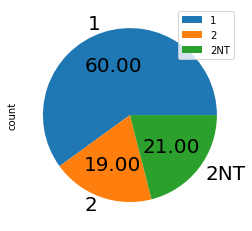

In [15]:
StaKV = df.groupby("KV")["KV"].agg(["count"])
StaKV.plot.pie(
    autopct="%.2f",
    fontsize=20,
    subplots=True,
    figsize=(8, 4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ea947eb50>],
      dtype=object)

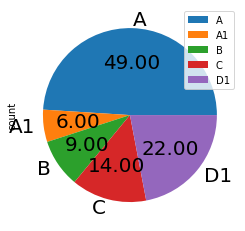

In [16]:
StaKT = df.groupby("KT")["KT"].agg(["count"])
StaKT.plot.pie(
    autopct="%.2f",
    fontsize=20,
    subplots=True,
    figsize=(8, 4))

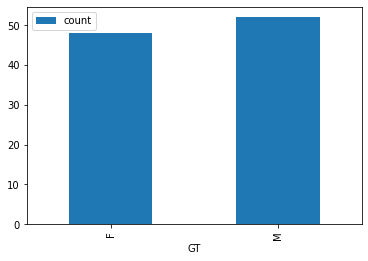

In [17]:
StaGT = df.groupby("GT")["GT"].agg(["count"])
StaGT.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ea8f3dd50>],
      dtype=object)

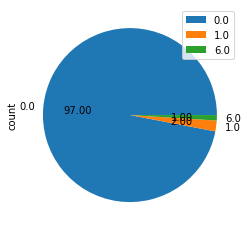

In [18]:
StaDT = df.groupby("DT")["DT"].agg(["count"])
StaDT.plot.pie(
    autopct="%.2f",
    subplots=True,
    figsize=(8, 4))

In [19]:
df["US_TBM1"]

STT
1      2.800
2      1.876
3      2.308
4      2.484
5      2.600
       ...  
96     2.972
97     1.972
98     2.820
99     1.660
100    2.104
Name: US_TBM1, Length: 100, dtype: float64

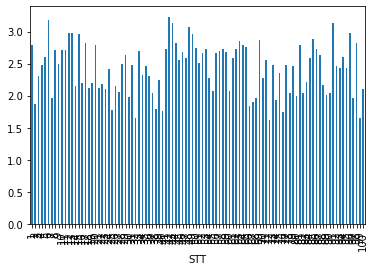

In [20]:
df['US_TBM1'].plot.bar()

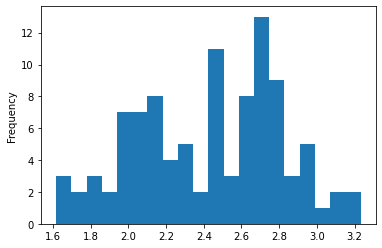

In [21]:
df['US_TBM1'].plot.hist(bins =20)

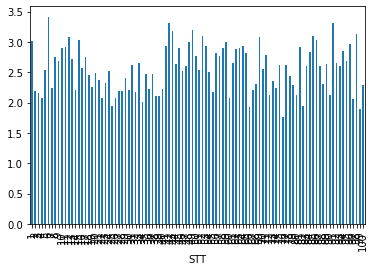

In [22]:
df["US_TBM2"].plot.bar()

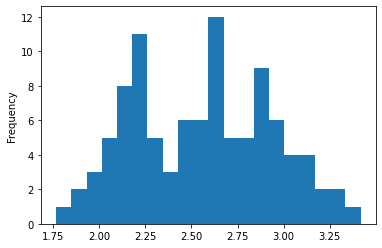

In [23]:
df["US_TBM2"].plot.hist(bins= 20)

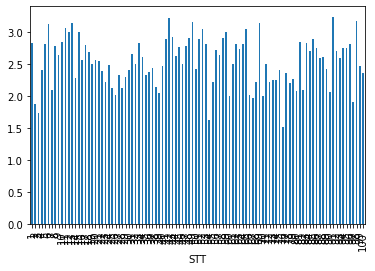

In [24]:
df["US_TBM3"].plot.bar()

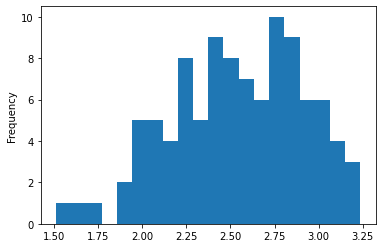

In [25]:
df["US_TBM3"].plot.hist(bins= 20)

In [26]:
DT_GTM = df[df.GT=='M'].groupby(['DT','GT']).agg({'GT':'count'}).rename(columns={'GT':'Count'})
DT_GTM

,,Count
DT,GT,
0.0,M,50
1.0,M,1
6.0,M,1


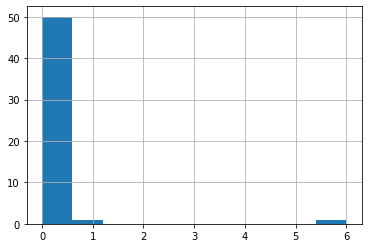

In [28]:
df.loc[(df.GT=='M'),'DT'].hist()

In [29]:
M_DT00_KV = df[(df.DT.isin(['0.0'])) & (df.GT =='M') & (df.DH1 >=5.0) & (df.DH2 >= 4.0) & (df.DH3 >= 4.0)].groupby(['DT','KV','GT']).agg({'GT':'count'})
M_DT00_KV

GT
DT  KV  GT    
0.0 1   M    2
    2   M    2
    2NT M    2

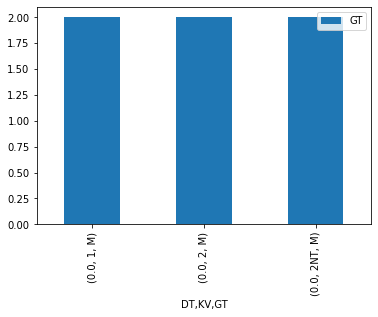

In [30]:
M_DT00_KV.plot.bar()

In [31]:
KV_2NT = df[(df.KV =='2NT') & (df.DH1 >= 5.0) & (df.DH2 >= 5.0) & (df.DH3 >= 5.0)].groupby(['KV','DH1','DH2','DH3']).agg({'KV':'count'}).rename(columns={'KV':'Count'})
KV_2NT

,,,,Count
KV,DH1,DH2,DH3,
2NT,6.75,5.25,5.0,1


In [32]:
KV_2NT_DH1 = df[(df.KV =='2NT') & (df.DH1 >= 5.0)].groupby(['KV','DH1']).agg({'KV':'count'}).rename(columns={'KV':'Count'})
KV_2NT_DH1

Count
KV  DH1        
2NT 5.25      2
    6.75      1
    7.00      1

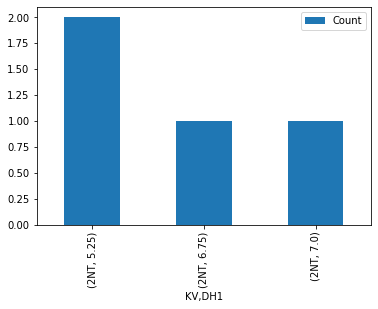

In [33]:
KV_2NT_DH1.plot.bar()

In [34]:
KV_2NT_DH2 = df[(df.KV =='2NT') & (df.DH2 >= 5.0)].groupby(['KV','DH2']).agg({'KV':'count'}).rename(columns={'KV':'Count'})
KV_2NT_DH2

Count
KV  DH2        
2NT 5.00      1
    5.25      3
    5.75      1
    8.00      1

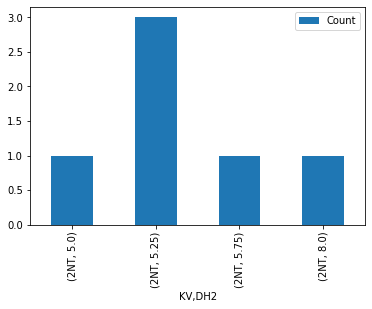

In [35]:
KV_2NT_DH2.plot.bar()

In [36]:
KV_2NT_DH3 = df[(df.KV =='2NT') & (df.DH3 >= 5.0)].groupby(['KV','DH3']).agg({'KV':'count'}).rename(columns={'KV':'Count'})
KV_2NT_DH3


Count
KV  DH3       
2NT 5.0      2
    5.5      1
    6.0      1
    6.5      2

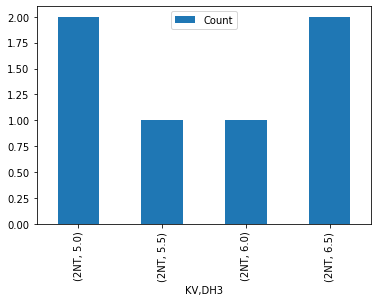

In [37]:
KV_2NT_DH3.plot.bar()

**Phần 3:**

In [38]:
XL_F = df[(df.GT == 'F')].groupby(['GT','XL1','XL2','XL3']).agg({'GT':'count'}).rename(columns={'GT':'Count'})
XL_F

Count
GT XL1 XL2 XL3       
F  G   G   G        1
   K   G   K        1
       K   K       20
           TB       1
       TB  TB       2
   TB  K   K        6
           TB       3
       TB  K        1
           TB       8
   Y   TB  TB       3
           Y        1
       Y   TB       1

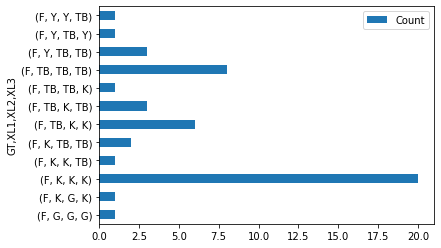

In [40]:
XL_F.plot.barh(stacked=True)

In [41]:
df[['KT']].groupby(['KT'])['KT'].agg('count')

KT
A     49
A1     6
B      9
C     14
D1    22
Name: KT, dtype: int64

In [42]:
TQ_KQXT = df[(df.KV.isin(['1','2'])) & df.KT.isin(['A','A1','B'])].groupby(['KT','KV','KQXT']).agg({'KQXT':'count'})
TQ_KQXT

KQXT
KT KV KQXT      
A  1  0.0     27
      1.0      2
   2  0.0      7
      1.0      2
A1 1  0.0      2
B  1  0.0      7
      1.0      1

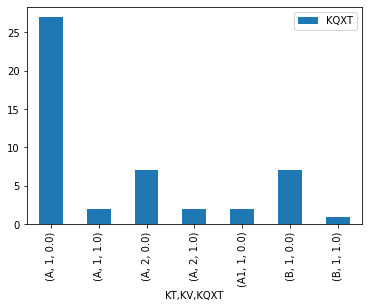

In [43]:
TQ_KQXT.plot.bar()

In [44]:
KV_KT = df.groupby(['KV','KT'])['KV'].agg('count')
KV_KT

KV   KT
1    A     29
     A1     2
     B      8
     C      8
     D1    13
2    A      9
     C      2
     D1     8
2NT  A     11
     A1     4
     B      1
     C      4
     D1     1
Name: KV, dtype: int64

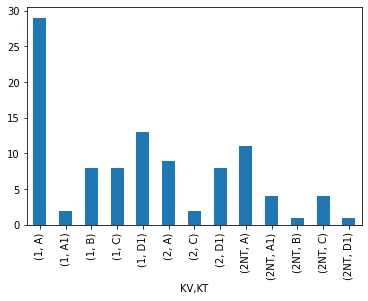

In [45]:
KV_KT.plot.bar()

In [46]:
DAU_ROT = df.groupby(['KQXT','KT']).agg({'KQXT':'count'})
DAU_ROT

KQXT
KQXT KT      
0.0  A     45
     A1     6
     B      7
     C     10
     D1    21
1.0  A      4
     B      2
     C      4
     D1     1

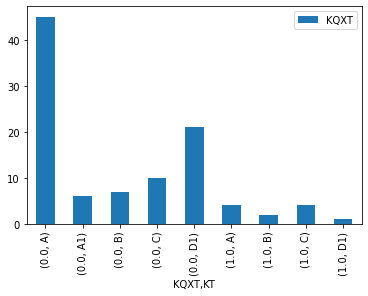

In [47]:
DAU_ROT.plot.bar()

In [48]:
DAUROT_KV = df.groupby(['KQXT','KV']).agg({'KQXT':'count'})
DAUROT_KV

KQXT
KQXT KV       
0.0  1      56
     2      15
     2NT    18
1.0  1       4
     2       4
     2NT     3

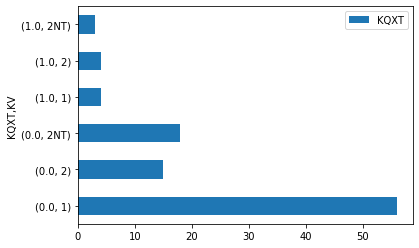

In [49]:
DAUROT_KV.plot.barh()

In [50]:
DAUROT_DT = df.groupby(['KQXT','DT']).agg({'KQXT':'count'})
DAUROT_DT

KQXT
KQXT DT       
0.0  0.0    86
     1.0     2
     6.0     1
1.0  0.0    11

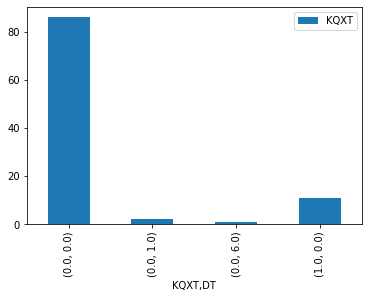

In [51]:
DAUROT_DT.plot.bar()

In [53]:
DAUROT_GT = df.groupby(['KQXT','GT']).agg({'KQXT':'count'})
DAUROT_GT

KQXT
KQXT GT      
0.0  F     45
     M     44
1.0  F      3
     M      8

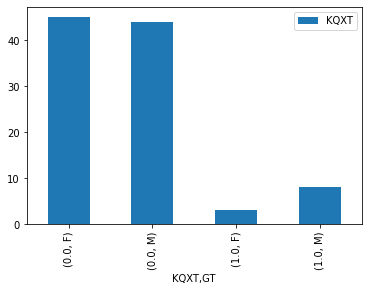

In [54]:
DAUROT_GT.plot.bar()

**Phần 4:**

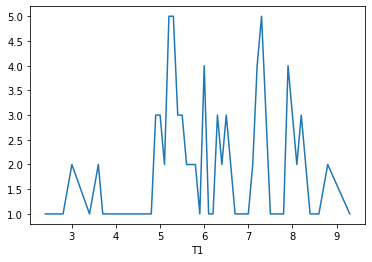

In [55]:
df.groupby('T1')['T1'].count().plot()

In [57]:
for i in df['T1']:
  df.loc[(df['T1'] >= 0) & (df['T1'] < 5), 'phanlopt1'] = 'Kem'
  df.loc[(df['T1'] >= 5) & (df['T1'] < 7), 'phanlopt1'] = 'tb'
  df.loc[(df['T1'] >= 7) & (df['T1'] < 8), 'phanlopt1'] = 'kha'
  df.loc[(df['T1'] >= 8), 'phanlopt1'] = 'gioi'
df.phanlopt1

STT
1       kha
2        tb
3        tb
4        tb
5        tb
       ... 
96     gioi
97      Kem
98     gioi
99      Kem
100     Kem
Name: phanlopt1, Length: 100, dtype: object

In [58]:
TS_phanloait1 = df.groupby('phanlopt1')['phanlopt1'].agg(['count'])
TS_phanloait1

,count
phanlopt1,
Kem,23
gioi,12
kha,19
tb,46


In [59]:
ML_phanloait1 = df.groupby(['T1','phanlopt1'])[['T1','phanlopt1']].count()
unstackphanlopt1 = ML_phanloait1.unstack()
unstackphanlopt1.head(10)

T1              phanlopt1             
phanlopt1  Kem gioi kha  tb       Kem gioi kha  tb
T1                                                
2.4        1.0  NaN NaN NaN       1.0  NaN NaN NaN
2.5        1.0  NaN NaN NaN       1.0  NaN NaN NaN
2.6        1.0  NaN NaN NaN       1.0  NaN NaN NaN
2.7        1.0  NaN NaN NaN       1.0  NaN NaN NaN
2.8        1.0  NaN NaN NaN       1.0  NaN NaN NaN
3.0        2.0  NaN NaN NaN       2.0  NaN NaN NaN
3.4        1.0  NaN NaN NaN       1.0  NaN NaN NaN
3.6        2.0  NaN NaN NaN       2.0  NaN NaN NaN
3.7        1.0  NaN NaN NaN       1.0  NaN NaN NaN
3.9        1.0  NaN NaN NaN       1.0  NaN NaN NaN

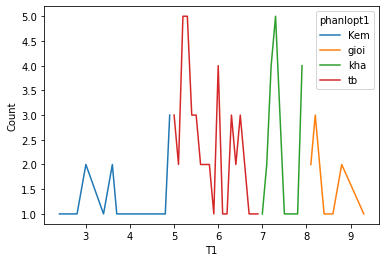

In [60]:
unstackphanlopt1['phanlopt1'].plot(ylabel = 'Count')

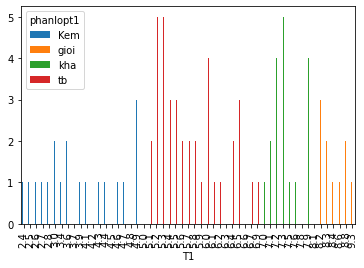

In [61]:
unstackphanlopt1['phanlopt1'].plot.bar()